<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/UMMLP1/UM_MLIntern_P1_1(11jan26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project 1 :: Vehicle Price Prediction

###Step 1: Importing The Lib's

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Step 2: Loding the Dataset

In [ ]:
file_path='/content/sample_data/Veh Prices Dataset.csv'
df_vpp= pd.read_csv(file_path)

In [ ]:
df_vpp.shape

(1002, 17)

In [ ]:
df_vpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [ ]:
df_vpp.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


In [ ]:
df_vpp.describe(include=['int','float'])

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [ ]:
df_vpp.describe(include='object')

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain
count,1002,946,1002,1002,1000,995,1000,1001,999,997,964,1002
unique,358,761,28,153,100,7,38,197,8,263,91,4
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,Hornet,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Limited,SUV,Bright White Clearcoat,Black,All-wheel Drive
freq,33,13,194,65,130,664,325,69,704,81,510,461


In [ ]:
df_vpp.sample(1).T

,463
name,2023 Buick Envision Preferred
description,\n \n White Frost Tricoat 2023 Bui...
make,Buick
model,Envision
year,2023
price,37135.0
engine,16V GDI DOHC Turbo
cylinders,4.0
fuel,Gasoline
mileage,6.0


In [ ]:
df_vpp[673:674]

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
673,2024 Honda CR-V Hybrid Sport-L,\n \n This 2024 Honda CR-V Hybrid ...,Honda,CR-V Hybrid,2024,37505.0,16V GDI DOHC Hybrid,4.0,Hybrid,0.0,Automatic CVT,Sport-L,SUV,4.0,Platinum White Pearl,NaN,Front-wheel Drive


In [ ]:
dfname=list(set(df_vpp['name'].values.tolist()))
dfname

['2024 Nissan Versa 1.6 SV',
 '2024 Dodge Hornet Hornet R/T Eawd',
 '2024 GMC Terrain SLE',
 "2024 RAM 3500 Laramie Mega Cab 4x4 6'4' Box",
 '2024 Ford Edge SE',
 '2024 Ford Expedition King Ranch',
 '2024 Audi SQ5 Premium Plus',
 '2024 Ford Edge ST-Line',
 '2024 BMW i4 Gran Coupe M50',
 '2024 Mazda CX-90 PHEV Premium Plus',
 '2024 Chevrolet Silverado 1500 WT',
 '2024 Hyundai Kona N Line',
 '2024 Jeep Wagoneer L Series II',
 '2024 BMW i4 Gran Coupe eDrive40',
 '2024 Mercedes-Benz GLE 450 4MATIC',
 '2024 Hyundai Sonata Hybrid SEL',
 '2024 Nissan Kicks S',
 '2024 Mercedes-Benz EQS 450 Base 4MATIC',
 '2024 Nissan Murano SL',
 '2024 Hyundai IONIQ 6 SEL',
 '2024 GMC Terrain Denali',
 '2024 Audi RS e-tron GT quattro',
 '2023 RAM 3500 Tradesman',
 '2024 Kia EV9 Light Long Range',
 '2024 Hyundai IONIQ 5 Limited',
 '2024 Chevrolet Silverado 1500 Custom Trail Boss',
 '2024 Hyundai Santa Fe SE 2.4',
 '2024 Jeep Grand Cherokee Summit',
 '2024 Jeep Compass Limited',
 '2023 Ford Transit Connect XLT',

In [ ]:
df_vpp['name']=df_vpp['name'].astype('str')
df_vpp['first_4_char']=df_vpp['name'].str[:4]
df_vpp['remain_char']=df_vpp['name'].str[4:]

In [ ]:
df_vpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
 17  first_4_char    1002 non-null   o

In [ ]:
df_vpp[['first_4_char','year']].sample(10).T

,412,970,483,178,753,468,608,587,382,187
first_4_char,2024,2024,2024,2023,2024,2024,2023,2024,2024,2024
year,2024,2024,2024,2023,2024,2024,2023,2024,2024,2024


In [ ]:
df_vpp[['first_4_char']].value_counts()

,count
first_4_char,
2024,906
2023,90
2025,6


####The following Columns have Null values in them

In [ ]:
Null_val={'description':56,
'price':23,
'engine':2,
'cylinders':105,
'fuel':7,
'mileage':34,
'transmission':2,
'trim':1,
'body':3,
'doors':7,
'exterior_color':5,
'interior_color':38}

###Step 3: Handling Null Values

In [ ]:
df_vpp[df_vpp['description'].isnull()].index.tolist()

[2,
 8,
 23,
 39,
 58,
 81,
 86,
 89,
 97,
 113,
 121,
 137,
 155,
 216,
 238,
 269,
 291,
 310,
 311,
 313,
 343,
 357,
 362,
 367,
 386,
 387,
 391,
 397,
 420,
 437,
 488,
 520,
 575,
 580,
 589,
 596,
 598,
 638,
 706,
 759,
 765,
 785,
 806,
 807,
 850,
 863,
 877,
 886,
 888,
 898,
 900,
 963,
 975,
 977,
 985,
 987]

In [ ]:
df_vpp[df_vpp['price'].isnull()].index.tolist()

[142,
 248,
 283,
 328,
 372,
 417,
 434,
 443,
 500,
 506,
 536,
 541,
 627,
 678,
 683,
 704,
 779,
 809,
 811,
 859,
 876,
 937,
 943]

In [ ]:
df_vpp[df_vpp['engine'].isnull()].index.tolist()

[614, 803]

In [ ]:
df_vpp[df_vpp['cylinders'].isnull()].index.tolist()

[14,
 28,
 33,
 35,
 49,
 50,
 53,
 62,
 68,
 86,
 100,
 110,
 116,
 121,
 128,
 131,
 142,
 146,
 180,
 191,
 192,
 209,
 210,
 214,
 218,
 219,
 223,
 227,
 239,
 251,
 252,
 253,
 255,
 273,
 287,
 291,
 293,
 307,
 315,
 323,
 328,
 337,
 340,
 347,
 372,
 373,
 384,
 390,
 392,
 393,
 409,
 413,
 419,
 424,
 436,
 447,
 479,
 480,
 481,
 484,
 489,
 490,
 494,
 495,
 499,
 512,
 514,
 522,
 531,
 554,
 555,
 563,
 567,
 573,
 582,
 586,
 590,
 598,
 604,
 610,
 613,
 630,
 632,
 661,
 681,
 725,
 726,
 728,
 737,
 742,
 743,
 747,
 752,
 764,
 767,
 777,
 813,
 839,
 866,
 883,
 884,
 893,
 941,
 944,
 978]

In [ ]:
df_vpp[df_vpp['fuel'].isnull()].index.tolist()

[128, 219, 315, 489, 490, 610, 726]

In [ ]:
df_vpp[df_vpp['mileage'].isnull()].index.tolist()

[27,
 47,
 63,
 73,
 84,
 87,
 93,
 177,
 217,
 219,
 225,
 234,
 261,
 262,
 365,
 399,
 461,
 476,
 489,
 490,
 503,
 594,
 596,
 607,
 628,
 629,
 801,
 847,
 879,
 885,
 906,
 916,
 922,
 980]

In [ ]:
df_vpp[df_vpp['transmission'].isnull()].index.tolist()

[725, 940]

In [ ]:
df_vpp[df_vpp['trim'].isnull()].index.tolist()

[805]

In [ ]:
df_vpp[df_vpp['body'].isnull()].index.tolist()

[164, 235, 687]

In [ ]:
df_vpp[df_vpp['doors'].isnull()].index.tolist()

[124, 190, 215, 610, 614, 857, 893]

In [ ]:
df_vpp[df_vpp['exterior_color'].isnull()].index.tolist()

[117, 137, 373, 608, 612]

In [ ]:
df_vpp[df_vpp['interior_color'].isnull()].index.tolist()

[44,
 48,
 71,
 77,
 134,
 137,
 161,
 169,
 245,
 286,
 407,
 414,
 416,
 443,
 446,
 452,
 454,
 466,
 478,
 480,
 582,
 608,
 612,
 673,
 675,
 708,
 741,
 771,
 790,
 812,
 819,
 824,
 844,
 853,
 858,
 940,
 967,
 971]

In [ ]:
idx=df_vpp[df_vpp['engine'].str.contains('DOHC', na=False)].index
print(len(idx))#691
print(1002-691)
print(idx.tolist())

691
311
[0, 5, 6, 8, 9, 10, 12, 13, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 30, 31, 32, 34, 37, 38, 39, 41, 42, 43, 45, 47, 48, 51, 52, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 69, 70, 72, 73, 74, 75, 76, 80, 82, 83, 85, 87, 88, 89, 91, 92, 93, 96, 99, 101, 102, 104, 105, 107, 108, 109, 111, 112, 113, 114, 115, 117, 118, 120, 123, 124, 125, 126, 127, 129, 130, 132, 133, 135, 136, 138, 139, 140, 141, 143, 144, 145, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 170, 171, 174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 190, 193, 194, 198, 199, 200, 202, 204, 206, 207, 211, 212, 213, 215, 216, 217, 220, 221, 222, 224, 225, 226, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 243, 244, 250, 256, 257, 258, 260, 261, 262, 263, 265, 266, 267, 270, 274, 275, 276, 277, 278, 279, 280, 281, 283, 284, 285, 288, 294, 295, 298, 300, 301, 302, 304, 305, 306, 309, 310, 311, 312, 316, 318, 319, 320, 321, 322, 32

###Creating a Seperate copy of DataFrame

In [ ]:
dfvpp_cpy=df_vpp.copy(deep=True)
dfvpp_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
 17  first_4_char    1002 non-null   o

In [ ]:
dfvpp_cpy.shape

(1002, 19)

In [ ]:
Null_val={'description':56,
'price':23,
'engine':2,
'cylinders':105,
'fuel':7,
'mileage':34,
'transmission':2,
'trim':1,
'body':3,
'doors':7,
'exterior_color':5,
'interior_color':38}

In [ ]:
icdict=dict(dfvpp_cpy['interior_color'].value_counts())
icdict

{'Black': np.int64(510),
 'Global Black': np.int64(84),
 'Gray': np.int64(77),
 'Jet Black': np.int64(45),
 'Ebony': np.int64(43),
 'Charcoal': np.int64(29),
 'Black Onyx': np.int64(16),
 'Titan Black': np.int64(11),
 'Diesel Gray/Black': np.int64(6),
 'Graphite': np.int64(6),
 'Black Interior Color': np.int64(6),
 'Greige': np.int64(6),
 'Medium Ash Gray': np.int64(5),
 'Beige / Black': np.int64(5),
 'Medium Gray': np.int64(5),
 'Dark Gray': np.int64(4),
 'Pebble Gray': np.int64(3),
 'Beige': np.int64(3),
 'White': np.int64(3),
 'Dk Palazzo Gry Fron': np.int64(3),
 'Okapi Brown': np.int64(3),
 'Ruby Red/Black': np.int64(3),
 'Red': np.int64(3),
 'Tacora Red': np.int64(3),
 'Jet Blk': np.int64(2),
 'Cognac': np.int64(2),
 'Teak/Light Shale': np.int64(2),
 'Noir w/Santorini Blue Accents': np.int64(2),
 'Nh-731p/Black': np.int64(2),
 'Tupelo': np.int64(2),
 'Pearl Beige': np.int64(2),
 'Jet Blk Premium Clth': np.int64(2),
 'Dark Palazzo Gray': np.int64(2),
 'Macchiato Beige': np.int64(2)

In [ ]:
dfvpp_cpy.describe(include='object')

,name,description,make,model,engine,fuel,transmission,trim,body,exterior_color,interior_color,drivetrain,first_4_char,remain_char
count,1002,946,1002,1002,1000,995,1000,1001,999,997,964,1002,1002,1002
unique,358,761,28,153,100,7,38,197,8,263,91,4,3,337
top,2023 Dodge Durango Pursuit,\n \n .\n \n,Jeep,Hornet,16V GDI DOHC Turbo,Gasoline,8-Speed Automatic,Limited,SUV,Bright White Clearcoat,Black,All-wheel Drive,2024,Dodge Durango Pursuit
freq,33,13,194,65,130,664,325,69,704,81,510,461,906,35


###Convert Object to String Data Type

In [ ]:
dfvpp_cpy['name']=dfvpp_cpy['name'].astype("string")

In [ ]:
dfvpp_cpy['description']=dfvpp_cpy['description'].astype("string")

In [ ]:
dfvpp_cpy['make']=dfvpp_cpy['make'].astype("string")

In [ ]:
dfvpp_cpy['model']=dfvpp_cpy['model'].astype("string")

In [ ]:
dfvpp_cpy['engine']=dfvpp_cpy['engine'].astype("string")

In [ ]:
dfvpp_cpy['fuel']=dfvpp_cpy['fuel'].astype("string")

In [ ]:
dfvpp_cpy['transmission']=dfvpp_cpy['transmission'].astype("string")

In [ ]:
dfvpp_cpy['trim']=dfvpp_cpy['trim'].astype("string")

In [ ]:
dfvpp_cpy['exterior_color']=dfvpp_cpy['exterior_color'].astype("string")

In [ ]:
dfvpp_cpy['interior_color']=dfvpp_cpy['interior_color'].astype("string")

###Filling Missing Values

In [ ]:
dfvpp_cpy['description'].fillna(dfvpp_cpy['description'].mode()[0], inplace=True)

/tmp/ipython-input-2394251440.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['description'].fillna(dfvpp_cpy['description'].mode()[0], inplace=True)


In [ ]:
dfvpp_cpy['price'].fillna(dfvpp_cpy['price'].mean(), inplace=True)

/tmp/ipython-input-83493644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['price'].fillna(dfvpp_cpy['price'].mean(), inplace=True)


In [ ]:
dfvpp_cpy['engine'].fillna(dfvpp_cpy['engine'].mode()[0], inplace=True)

/tmp/ipython-input-3150972399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['engine'].fillna(dfvpp_cpy['engine'].mode()[0], inplace=True)


In [ ]:
dfvpp_cpy['cylinders'].fillna(dfvpp_cpy['cylinders'].mean(), inplace=True)

/tmp/ipython-input-777596422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['cylinders'].fillna(dfvpp_cpy['cylinders'].mean(), inplace=True)


In [ ]:
dfvpp_cpy['fuel'].fillna(dfvpp_cpy['fuel'].mode()[0], inplace=True)

/tmp/ipython-input-3144416185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['fuel'].fillna(dfvpp_cpy['fuel'].mode()[0], inplace=True)


In [ ]:
dfvpp_cpy['mileage'].fillna(dfvpp_cpy['mileage'].mean(), inplace=True)

/tmp/ipython-input-2069995987.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['mileage'].fillna(dfvpp_cpy['mileage'].mean(), inplace=True)


In [ ]:
dfvpp_cpy['transmission'].fillna(dfvpp_cpy['transmission'].mode()[0], inplace=True)

/tmp/ipython-input-4129036530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['transmission'].fillna(dfvpp_cpy['transmission'].mode()[0], inplace=True)


In [ ]:
dfvpp_cpy['trim'].fillna(dfvpp_cpy['trim'].mode()[0], inplace=True)

/tmp/ipython-input-652711230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['trim'].fillna(dfvpp_cpy['trim'].mode()[0], inplace=True)


In [ ]:
dfvpp_cpy['body'].fillna(dfvpp_cpy['body'].mode()[0], inplace=True)

/tmp/ipython-input-875517492.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['body'].fillna(dfvpp_cpy['body'].mode()[0], inplace=True)


In [ ]:
dfvpp_cpy['doors'].fillna(dfvpp_cpy['doors'].mean(), inplace=True)

/tmp/ipython-input-3163763116.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['doors'].fillna(dfvpp_cpy['doors'].mean(), inplace=True)


In [ ]:
dfvpp_cpy['exterior_color'].fillna(dfvpp_cpy['exterior_color'].mode()[0], inplace=True)

/tmp/ipython-input-1698544598.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['exterior_color'].fillna(dfvpp_cpy['exterior_color'].mode()[0], inplace=True)


In [ ]:
dfvpp_cpy['interior_color'].fillna(dfvpp_cpy['interior_color'].mode()[0], inplace=True)

/tmp/ipython-input-1291575588.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfvpp_cpy['interior_color'].fillna(dfvpp_cpy['interior_color'].mode()[0], inplace=True)


In [ ]:
dfvpp_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   string 
 1   description     1002 non-null   string 
 2   make            1002 non-null   string 
 3   model           1002 non-null   string 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1002 non-null   string 
 7   cylinders       1002 non-null   float64
 8   fuel            1002 non-null   string 
 9   mileage         1002 non-null   float64
 10  transmission    1002 non-null   string 
 11  trim            1002 non-null   string 
 12  body            1002 non-null   object 
 13  doors           1002 non-null   float64
 14  exterior_color  1002 non-null   string 
 15  interior_color  1002 non-null   string 
 16  drivetrain      1002 non-null   object 
 17  first_4_char    1002 non-null   o

In [ ]:
dfvpp_cpy.drop(['first_4_char','remain_char'], axis=1,inplace=True)

In [ ]:
dfvpp_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   string 
 1   description     1002 non-null   string 
 2   make            1002 non-null   string 
 3   model           1002 non-null   string 
 4   year            1002 non-null   int64  
 5   price           1002 non-null   float64
 6   engine          1002 non-null   string 
 7   cylinders       1002 non-null   float64
 8   fuel            1002 non-null   string 
 9   mileage         1002 non-null   float64
 10  transmission    1002 non-null   string 
 11  trim            1002 non-null   string 
 12  body            1002 non-null   object 
 13  doors           1002 non-null   float64
 14  exterior_color  1002 non-null   string 
 15  interior_color  1002 non-null   string 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(2

###Extracting Text Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_name = TfidfVectorizer(max_features=2000)
dfname = df_name.fit_transform(dfvpp_cpy['name'])

In [ ]:
df_desc = TfidfVectorizer(max_features=2000)
dfdesc = df_desc.fit_transform(dfvpp_cpy['description'])

In [ ]:
df_make = TfidfVectorizer(max_features=2000)
dfmake = df_make.fit_transform(dfvpp_cpy['make'])

In [ ]:
df_model = TfidfVectorizer(max_features=2000)
dfmodel = df_model.fit_transform(dfvpp_cpy['model'])

In [ ]:
df_engine = TfidfVectorizer(max_features=2000)
dfengine = df_engine.fit_transform(dfvpp_cpy['engine'])

In [ ]:
df_fuel = TfidfVectorizer(max_features=2000)
dffuel = df_fuel.fit_transform(dfvpp_cpy['fuel'])

In [ ]:
df_trans = TfidfVectorizer(max_features=2000)
dftrans = df_trans.fit_transform(dfvpp_cpy['transmission'])

In [ ]:
df_trim = TfidfVectorizer(max_features=2000)
dftrim = df_trim.fit_transform(dfvpp_cpy['trim'])

In [ ]:
df_body = TfidfVectorizer(max_features=2000)
dfbody = df_body.fit_transform(dfvpp_cpy['body'])

In [ ]:
df_ecolor = TfidfVectorizer(max_features=2000)
dfecolor = df_ecolor.fit_transform(dfvpp_cpy['exterior_color'])

In [ ]:
df_icolor = TfidfVectorizer(max_features=2000)
dficolor = df_icolor.fit_transform(dfvpp_cpy['interior_color'])

In [ ]:
df_dtrain = TfidfVectorizer(max_features=2000)
dfdtrain = df_dtrain.fit_transform(dfvpp_cpy['drivetrain'])

In [ ]:
dfdesc

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 85835 stored elements and shape (1002, 2000)>

In [ ]:
txt_cols=[dfname, dfdesc, dfmake, dfmodel, dfengine, dffuel, dftrans, dftrim, dfbody, dfecolor, dficolor, dfdtrain]

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

Num_cols=['year','cylinders','mileage','doors']
SS=StandardScaler()

Num_Features=SS.fit_transform(dfvpp_cpy[Num_cols])
dfvpp_cpy['price']=SS.fit_transform(dfvpp_cpy[['price']])

###Stacking

In [ ]:
from scipy.sparse import hstack, csr_matrix

NumFeat=csr_matrix(Num_Features)
new_df=hstack([NumFeat, dfname, dfdesc, dfmake, dfmodel, dfengine, dffuel, dftrans, dftrim, dfbody, dficolor, dficolor, dfdtrain])

In [ ]:
new_df

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 112493 stored elements and shape (1002, 3077)>

###Seperating the Independent & Dependent Features

In [ ]:
X=new_df
y=dfvpp_cpy['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 3077)
(201, 3077)
(801,)
(201,)


#MODEL BUILDING

####Model 1:: Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model=LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_model.score(X_train, y_train)

0.9992874434854593

In [ ]:
lr_model.fit(X_test, y_test)

LinearRegression()

In [ ]:
lr_model.score(X_test, y_test)

0.9996586629108828

####Model Predictions on test dataset

In [ ]:
mod1_pred=lr_model.predict(X_test)

In [ ]:
new_df[:1,0:3077]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 178 stored elements and shape (1, 3077)>

In [ ]:
pred1=lr_model.predict(new_df[:1,0:3077])
print(pred1)
ov=SS.inverse_transform([pred1])
print(ov[0][0])
ov

[0.86293035]
66145.69121495624


array([[66145.69121496]])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

R2= r2_score(y_test, mod1_pred)
print(f'The R² value-Coeff of Determination is found to be::{R2}')
print()
MSE=mean_squared_error(mod1_pred, y_test)
print(f'The Mean Square Error value-MSE is found to be::{MSE}')

The R² value-Coeff of Determination is found to be::0.9996586629108828

The Mean Square Error value-MSE is found to be::0.0002549417465860021


#### Model 2:: Ridge Regression

In [ ]:

import numpy as np
from sklearn.linear_model import Ridge

stack_X = np.column_stack([xgb_pred, ann_pred])

meta_model = Ridge(alpha=1.0)
meta_model.fit(stack_X, y_test)

final_pred = meta_model.predict(stack_X)

NameError: name 'ann_pred' is not defined

#### Model 3:: Lasso Regression

In [ ]:

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('lasso', Lasso(alpha=0.1))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred[0]

np.float64(-0.34155407166658824)

In [ ]:

from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(
    alphas=[0.001, 0.01, 0.1, 1, 10],
    cv=5
)

lasso_cv.fit(X_train, y_train)

best_alpha = lasso_cv.alpha_

####Model 4:: ElasticNet Regression

In [ ]:

from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

model = Pipeline([
    #('scaler', StandardScaler()),
    ('elastic', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:

from sklearn.linear_model import ElasticNetCV

enet_cv = ElasticNetCV(
    l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9],
    alphas=[0.001, 0.01, 0.1, 1, 10],
    cv=5
)

enet_cv.fit(X_train, y_train)

best_alpha = enet_cv.alpha_
best_l1_ratio = enet_cv.l1_ratio_

####Model 5:: (ANN)Neural Network Model for Prices

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)   # price output
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0036 - mae: 0.0410 - val_loss: 0.1280 - val_mae: 0.2274
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0029 - mae: 0.0390 - val_loss: 0.1264 - val_mae: 0.2187
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0035 - mae: 0.0430 - val_loss: 0.1252 - val_mae: 0.2149
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - mae: 0.0410 - val_loss: 0.1268 - val_mae: 0.2147
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0047 - mae: 0.0503 - val_loss: 0.1189 - val_mae: 0.2111
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0038 - mae: 0.0414 - val_loss: 0.1335 - val_mae: 0.2183
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0057 - mae: 0.0544 - val_loss: 0.1202 - val_mae: 0.2175
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0051 - mae: 0.0494 - val_loss: 0.1285 - val_mae: 0.2220
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.003

####Model 6:: XGBoost

In [ ]:

import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8
)

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_pred[0]

np.float32(-0.945554)

####Model 7:: CatBoost

In [ ]:
!pip install --upgrade catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [ ]:

from catboost import CatBoostRegressor

cat_features = ['brand', 'model', 'fuel_type', 'transmission']

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    eval_metric='RMSE',
    verbose=100
)

model.fit(
    X_train, y_train,
    #cat_features=cat_features,
    #eval_set=(X_val, y_val)
)

y_pred = model.predict(X_test)

0:	learn: 1.0109431	total: 505ms	remaining: 8m 24s
100:	learn: 0.4556800	total: 25.5s	remaining: 3m 47s
200:	learn: 0.2824229	total: 50.2s	remaining: 3m 19s
300:	learn: 0.1967153	total: 1m 18s	remaining: 3m 1s
400:	learn: 0.1538151	total: 1m 43s	remaining: 2m 34s
500:	learn: 0.1253029	total: 2m 8s	remaining: 2m 7s
600:	learn: 0.1073830	total: 2m 33s	remaining: 1m 41s
700:	learn: 0.0929487	total: 2m 58s	remaining: 1m 16s
800:	learn: 0.0824682	total: 3m 23s	remaining: 50.5s
900:	learn: 0.0728789	total: 3m 48s	remaining: 25.1s
999:	learn: 0.0645266	total: 4m 13s	remaining: 0us


In [ ]:
y_pred[0]

np.float64(-0.9335847599382512)

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,1,26.814842
1,2631,5.968310
2,2656,4.462853
3,15,3.342960
4,3073,2.131213
...,...,...
3072,3065,0.000000
3073,3066,0.000000
3074,3069,0.000000
3075,3070,0.000000


####Model 8:: LightGBM

In [ ]:

import lightgbm as lgb

model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:

model.fit(
    X_train, y_train,
    #eval_set=[(X_val, y_val)],
    eval_metric='rmse',
    #early_stopping_rounds=50,
    #verbose=100
)

y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20000
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 962
[LightGBM] [Info] Start training from score 0.027761
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
#X['fuel_type'] = X['fuel_type'].astype('category')

In [ ]:
model = lgb.LGBMRegressor(categorical_feature=['brand','fuel_type'])

In [ ]:
#lgb.plot_importance(model, max_num_features=15)
import shap
#shap.TreeExplainer(model).shap_values(X_sample)

####Model 9:: Random Forest Regressor

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
'''
X = df.drop('price', axis=1)
y = df['price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)'''

"\nX = df.drop('price', axis=1)\ny = df['price']\n\nX = pd.get_dummies(X, drop_first=True)\n\nX_train, X_test, y_train, y_test = train_test_split(\n    X, y, test_size=0.2, random_state=42\n)"

In [ ]:

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=300, n_jobs=-1,
                      random_state=42)

In [ ]:
rf_model.predict(new_df[:1,:])

array([1.47419706])

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)# squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.5596036802500604
RMSE: 0.5167300665925111
R²: 0.30815906319001296


####Model 10:: Decision Tree Regressor

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

dt_model = DecisionTreeRegressor(
    criterion='squared_error',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)# squared=False)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.2891559960045579
RMSE: 0.2286142474369148
R²: 0.6939123435223044


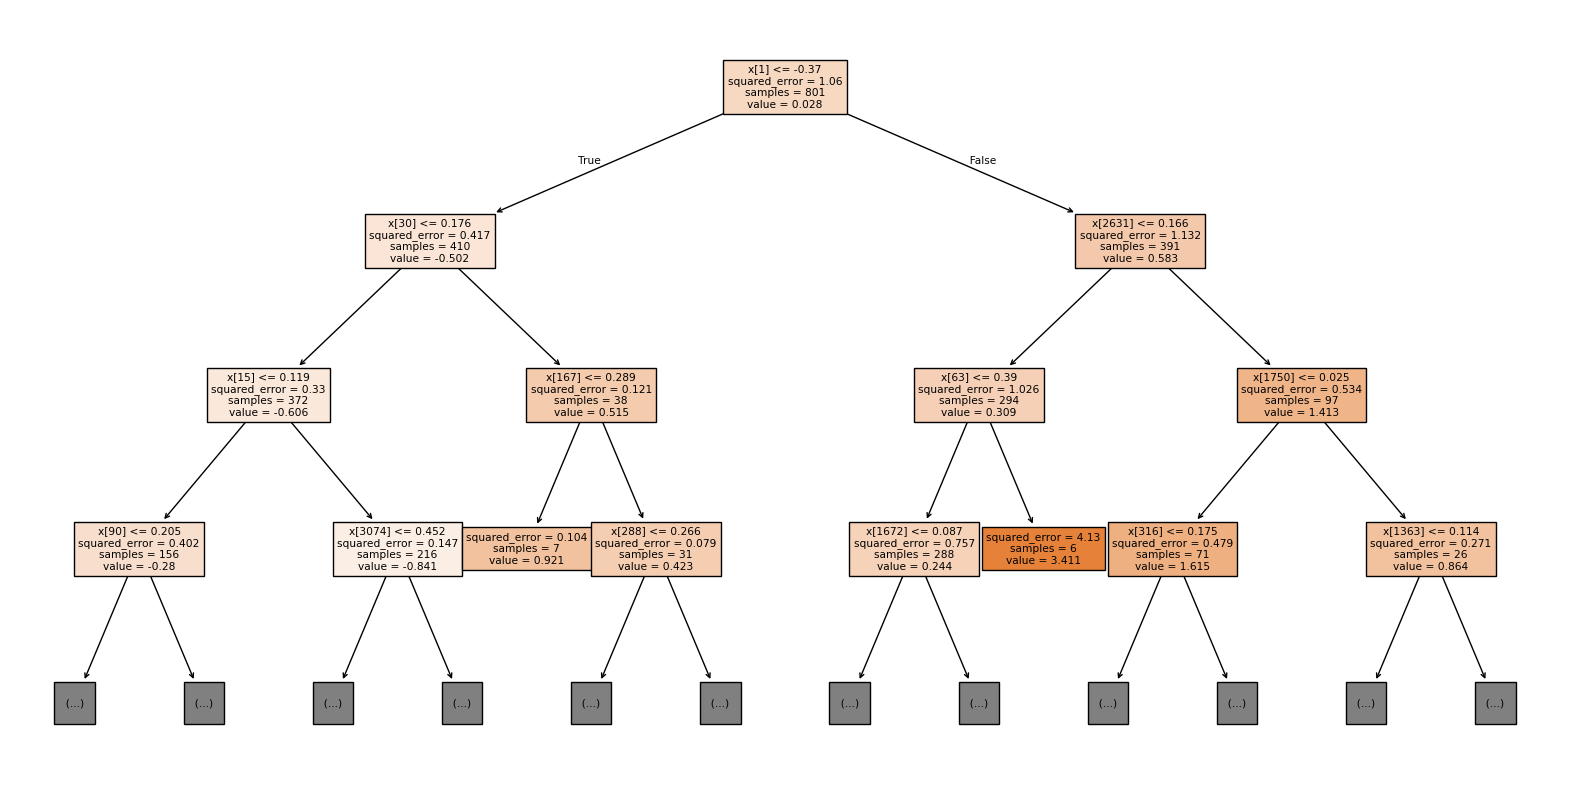

In [ ]:

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(
    dt_model,
    #feature_names=X.columns,
    filled=True,
    max_depth=3
)
plt.show()

####Model 11:: KNNRegressor

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

X = df.drop('price', axis=1)
y = df['price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

knn_model = KNeighborsRegressor(
    n_neighbors=5,
    weights='distance',
    metric='minkowski',
    p=2
)

knn_model.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(3, 21)}

grid = GridSearchCV(
    KNeighborsRegressor(weights='distance'),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error'
)

grid.fit(X_train, y_train)
best_k = grid.best_params_['n_neighbors']

####Model 12:: SVMRegressor

In [ ]:

from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

X = df.drop('price', axis=1)
y = df['price']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Both X and y must be scaled.

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [ ]:

svr_model = SVR(
    kernel='rbf',
    C=100,
    epsilon=0.1,
    gamma='scale'
)

svr_model.fit(X_train, y_train)

SVR(C=100)

In [ ]:

y_pred_scaled = svr_model.predict(X_test)
#y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

####Model 13:: GridSearchCV with KFold

In [ ]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [15, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

###Exploratory Data Analysis